[ 6.94257578] 7.22849861442e-07


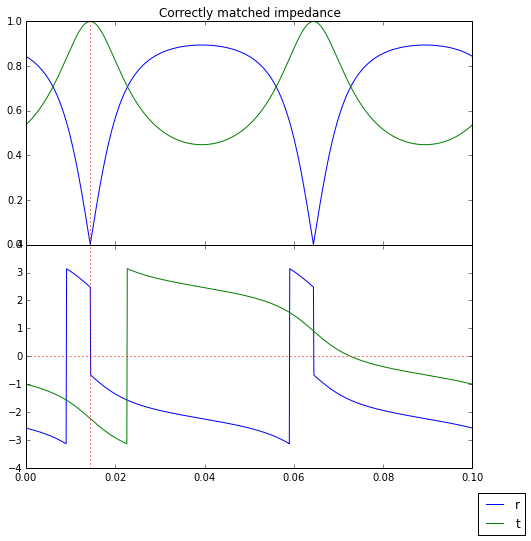

In [25]:
from __future__ import division
from scipy.optimize import minimize as minimise
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
from cmath import exp, pi, phase
plt.rcParams['figure.figsize'] = (8.0, 8.0)

def wave_match(mass, rho, wavelength, l):
    k = 2*pi / wavelength
    l = float(l)
    p = exp(1j * k * l)
    K = mass * 2 * pi / (1j * rho * wavelength)
    
    
    A = np.array([
            [-1, 1,     1,   0],
            [ 1, 1-K,  -1-K, 0],
            [ 0, 1/p,   p,  -1],
            [ 0, 1/p,  -p,  -1+K],
        ])
    
    b = np.array([
            1,
            1,
            0,
            0])
    
    #solve Ax = b for x where x = [r, a, b, t]
    r, a, b, t = np.linalg.solve(A,b);
    
    return {"r": r, "t": t}

wavelength = 0.1

def a(l): return wave_match(mass = 0.005, rho = 0.2, wavelength = wavelength, l=l)
def abs_a(l): return abs(a(l)["r"])

matching_point = minimise(abs_a, 0.1/7, tol = 1e-7).x

print 0.1 / matching_point, abs_a(matching_point)

L = np.arange(0, wavelength, wavelength / 1000)

f, (ax1, ax2) = plt.subplots(2, sharex='col', sharey='row')
f.subplots_adjust(hspace=0)
ax1.set_title("Correctly matched impedance")


r, = ax1.plot(L, [abs(a(l)["r"]) for l in L ])
t, = ax1.plot(L, [abs(a(l)["t"]) for l in L ])
ax1.plot((matching_point, matching_point), (1.0, 0), "r:")
_ = plt.figlegend((r,t), ("r", "t"), "lower right")



ax2.plot(L, [phase(a(l)["r"]) for l in L ])
ax2.plot(L, [phase(a(l)["t"]) for l in L ])
ax2.plot((0, wavelength - 0.0001), (0.0, 0.0), "r:")
ax2.plot((matching_point, matching_point), (-4, 4), "r:")
